# **Creating a Linear Regression Model**

## **Import Libraries for data handling, visualisation, model training, and evaluation.**

In [3]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

- **Pandas** - analysing, cleaning, exploring, and manipulating data- **Numpy** - working with arrays. It also has functions for working in domain of linear algebra, fourier transform and matrices.
- **Matplotlib.pylot** - Each pyplot function makes some change to a figure e.g., creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. in matplotlib.
- **Scikit-learn (sklearn)** - is an open source data analysis library, and the gold standard for Machine Learning (ML) in Python. It has Algorithmic decision-making methods, including Classification, which identifies and catergorises data based on patternss.


## **Load the Automobile Dataset and name the columns accordingly**

In [6]:
# Load the explore the dataset
data = pd.read_csv('Automobile-dataset.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
# Show all column names in a dataset
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [8]:
# Show informantion about the dataset (datatypes)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


## **Data Preprocessing: Handle missing values to ensure that all features are numeric**

In [10]:
# Data Preprocessing
# Handle the missing values (remove rows with missing values)
data = data.dropna()

In [11]:
# Check for missing values
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [12]:
# Check for duplicated values
print('sum of duplicated values: {}\n'.format(data.duplicated().sum()))

sum of duplicated values: 0



In [13]:
# Summary statistics of the data
display(data.describe())

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


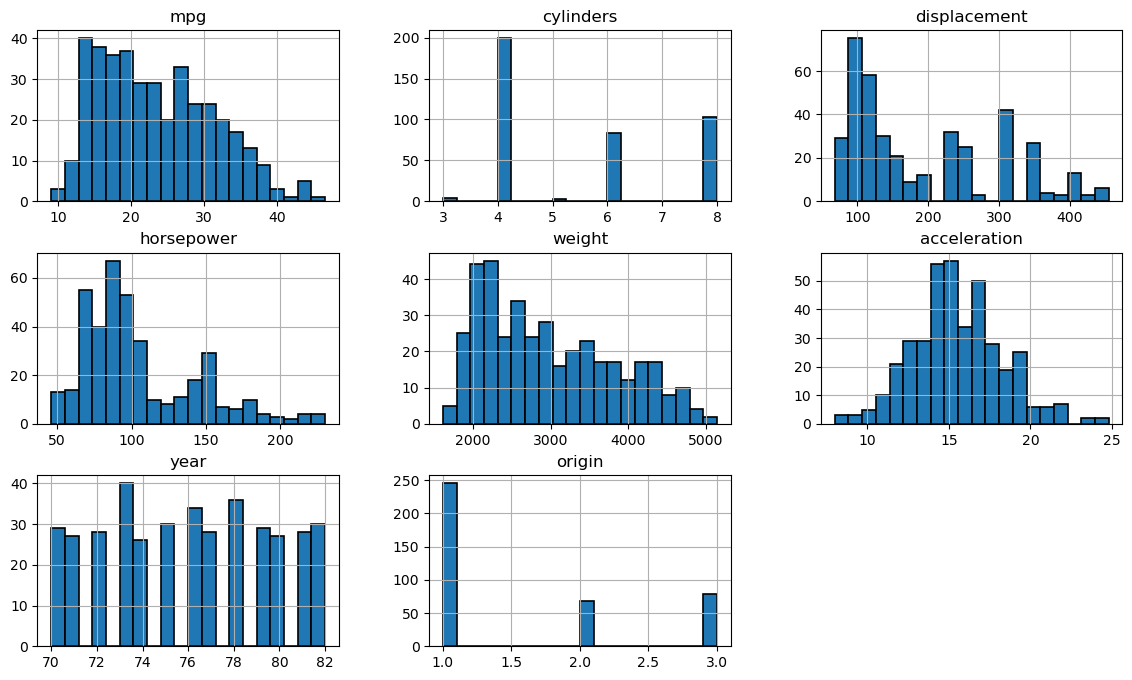

In [14]:
# Visualise the distribution of the features
data.hist(figsize=(14,8), bins=20, edgecolor='black', linewidth=1.2)
plt.show()

## **Define the Features and Target Variable: Select the features and set 'mpg' as the target variable**

Linear Regression needs input variables (features) which will predict your output variable (target variable). As we want to predict MPG, other columns like Year will be the features.

In [17]:
# Define the features (X) and target variable (y)
X = data[[ 'acceleration','weight', 'horsepower', 'displacement','cylinders' ]]
y = data['mpg']

In [ ]:
X= X.drop(['cylinders', 'displacement','acceleration'],axis=1) 

## **Split the data into training (80%) and testing (20%) sets**

When building a machine learning model, we need to train the model on a dataset, so it can understand the underlying structure and statistics. The typical split is 80% Train, 20% Test. 
Sometimes you may see this split 75% Train and 25% Test.

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Our training set is the feature model (X = acceleration etc)
- Test set is the "mpg" data

## **Intialise Model & Training the Model: Training the model using the Training data**

Training the Model using the Ordinary Least Squares Algorithm. This is the algorithm which Linear Regression uses.

In [24]:
# Initialise the Linear Regression model using statsmodel for p-values
X_train_sm = sm.add_constant(X_train) # Adding a constant term for intercept
model_sm = sm.OLS(y_train, X_train_sm).fit() # Fit model using Ordinary least squares

## **Model summary: Display the summary which includes p-values**

Once the model has been trained, it is worth looking at some of the summary of the model. Using the summary() function to view coefficiencts, standard error, R-Squared value and other statistical properties that are useful in determining the models performance. 

In [27]:
# Determine the summary which includes p-values
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     155.3
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           7.57e-82
Time:                        14:23:56   Log-Likelihood:                -895.42
No. Observations:                 313   AIC:                             1803.
Df Residuals:                     307   BIC:                             1825.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.8371      2.955     15.849   

The P-value which is denoted as P>|t| in this case can determine the suitability of the feature being used within the model. The model could be enhanced by removing certain variables with p-values greater than 0.05.

## **Make Predictions: Predict MPG on the test set**

Looking at the Test dataset agaisnt our trained model to predict values.

In [31]:
# Make predictions on the testing set
X_test_sm = sm.add_constant(X_test) # Adding constant term for the test set (the value at which the fitted line crosses the y-axis)
y_pred = model_sm.predict(X_test_sm)

## **Evaluate the Model: Calculating the Mean Squared Error and R-squared value to assess the models performance**

Some of the key performance indicators are the Mean Squared Error and R-Squared. 

In [34]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 17.94
R-squared (R2): 0.65


65% of the variability of the response data

## **Plot the Results: Plot a graph comparing Actual vs Predicted MPG values**

Can plot the actual MPG values against the predicted MPG values to see how the model has compared with accuracy

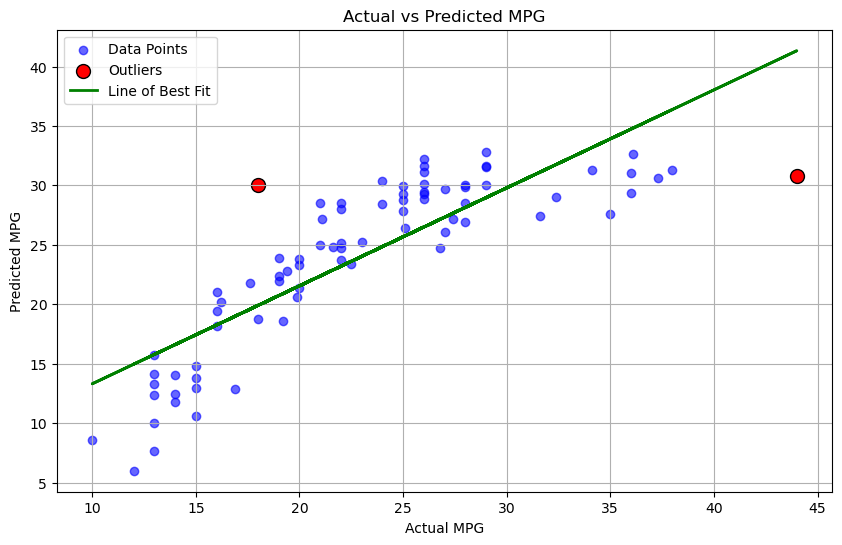

In [38]:
# Define a threshold for outliers (2 standard deviations)
residuals = y_test - y_pred
threshold = 2 * np.std(residuals)

# Identify the outliers (absolute residuals greater than the threshold)
outliers = np.abs(residuals) > threshold

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test[~outliers], y_pred[~outliers], color='blue', alpha=0.6, label='Data Points')
plt.scatter(y_test[outliers], y_pred[outliers], color='red', edgecolor='black', s=100, label='Outliers', marker='o')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True)

# Line of best fit
line_fit = np.polyfit(y_test, y_pred, 1)  # 1 is the degree of the polynomial (linear fit)
plt.plot(y_test, np.polyval(line_fit, y_test), color='green', linewidth=2, label='Line of Best Fit')

# Add legend
plt.legend()

# Show the plot
plt.show()

## **Model Residuals: Plot Model Residuals**

When the model predicted values is not the same as the actual, the difference between these are residuals. When the residual are near 0, this is considered as a "good fit".

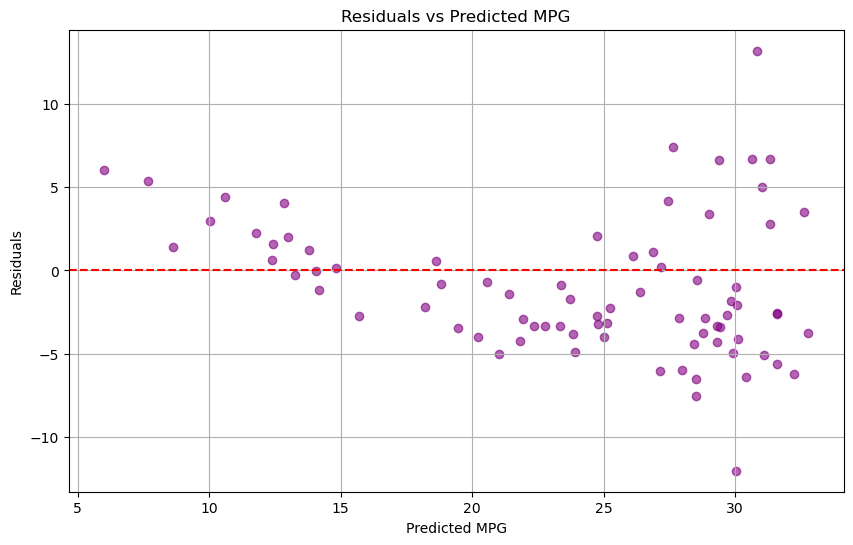

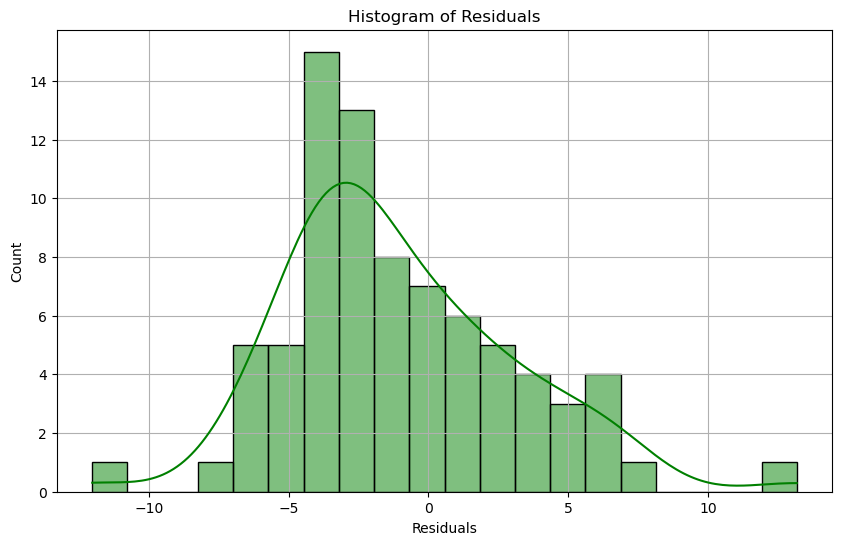

In [41]:
# Model Diagnostics
import seaborn as sns
# Residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted MPG")
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='green', bins=20)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

## **Principle Component Analysis and Linear Regression**

Machine learning models sometimes contain a large amount of different variables to consider. This high dimensionality can make the model very complex. PCA is a statistical technique often used in regression analysis, especially when dealing with high-dimensional data. Its primary purpose in the context of regression is to reduce the dimensionality of the data while retaining as much variability as possible, thereby improving model perfomance and interpretability.

PCA is an unsupervised learning algorithm

We need to scale our data so that each feature has a single unit variance

In [45]:
# Import necessary libraries
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict

In [46]:
X = data[[ 'acceleration','weight', 'horsepower', 'displacement','cylinders' ]]
y = data['mpg']

In [47]:
# Normalise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

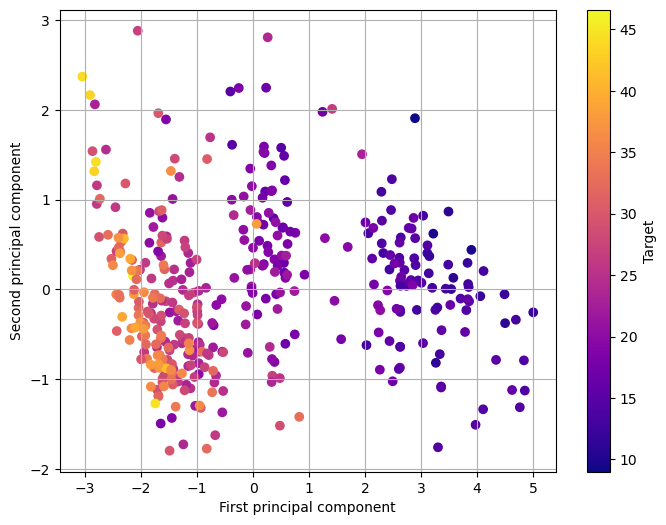

In [48]:
# Normalise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 principal components (for 2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualise the PCA result in 2D
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='plasma')  # Colour by the target variable
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.colorbar(label='Target')  # Adds a colorbar for target values
plt.grid(True)
plt.show()

In [49]:
# Explained variance ratio to understand how much variance each component explains
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by the first 2 components: {explained_variance}')

Explained variance by the first 2 components: [0.81437196 0.13877225]


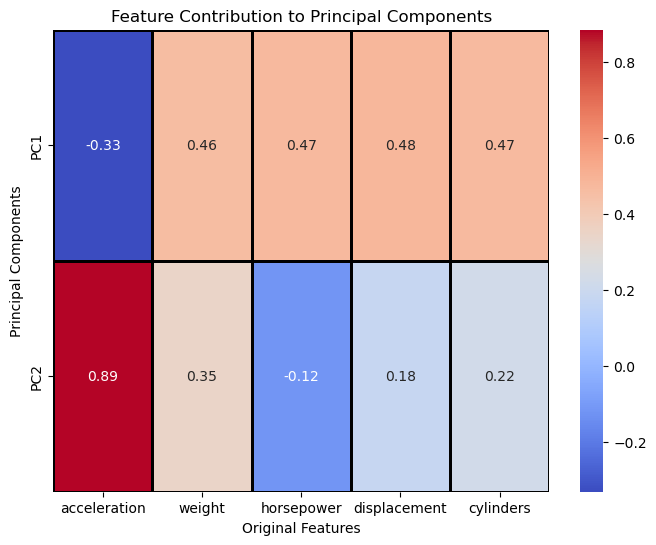

In [50]:
# Import seaborn for the heatmap
pca_components = pca.components_

# Create a DataFrame for better visualisation
# This shows how much each original feature contributes to each principal component
component_df = pd.DataFrame(pca_components, columns=X.columns, index=['PC1', 'PC2'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(component_df, annot=True, cmap='coolwarm', linewidths=1, linecolor = 'black', cbar=True)
plt.title('Feature Contribution to Principal Components')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.show()

## **Build the linear regression model using PCA data**

In [52]:
# Split the PCA-transformed data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialise the Linear Regression model using statsmodel for p-values
X_train_sm = sm.add_constant(X_train) # Adds a constant term for intercept
model_sm = sm.OLS(y_train, X_train_sm).fit() # Fit model using Ordinary least squares

# Determine the summary which includes p-values
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     364.5
Date:                Sat, 21 Sep 2024   Prob (F-statistic):           3.90e-82
Time:                        14:23:58   Log-Likelihood:                -903.51
No. Observations:                 313   AIC:                             1813.
Df Residuals:                     310   BIC:                             1824.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.6560      0.246     95.982      0.0

In [53]:
# Make predictions on the testing set
X_test_sm = sm.add_constant(X_test) # Adding constant term for the test set (the value at which the fitted line crosses the y-axis)
y_pred = model_sm.predict(X_test_sm)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 18.57
R-squared (R2): 0.64


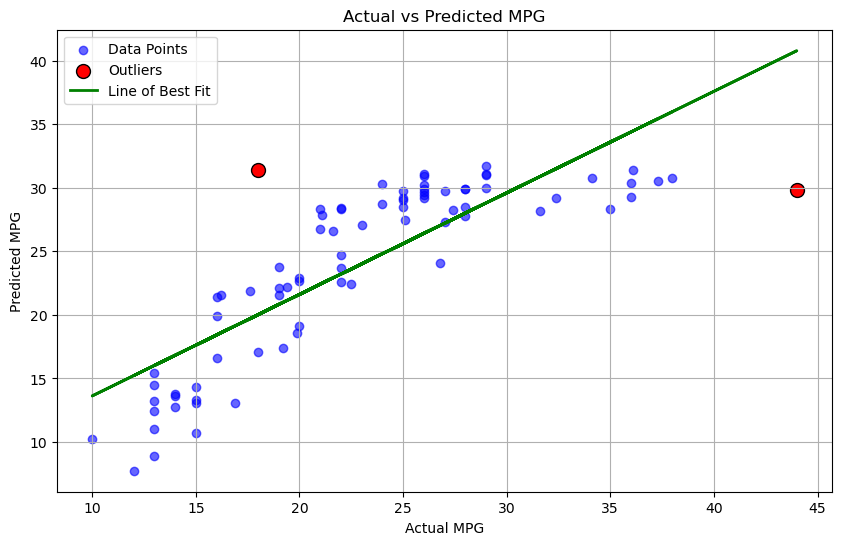

In [83]:
# Define a threshold for outliers (2 standard deviations)
residuals = y_test - y_pred
threshold = 2 * np.std(residuals)

# Identify the outliers (absolute residuals greater than the threshold)
outliers = np.abs(residuals) > threshold

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test[~outliers], y_pred[~outliers], color='blue', alpha=0.6, label='Data Points')
plt.scatter(y_test[outliers], y_pred[outliers], color='red', edgecolor='black', s=100, label='Outliers', marker='o')
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True)

# Line of best fit
line_fit = np.polyfit(y_test, y_pred, 1)  # 1 is the degree of the polynomial (linear fit)
plt.plot(y_test, np.polyval(line_fit, y_test), color='green', linewidth=2, label='Line of Best Fit')

# Add legend
plt.legend()

# Show the plot
plt.show()

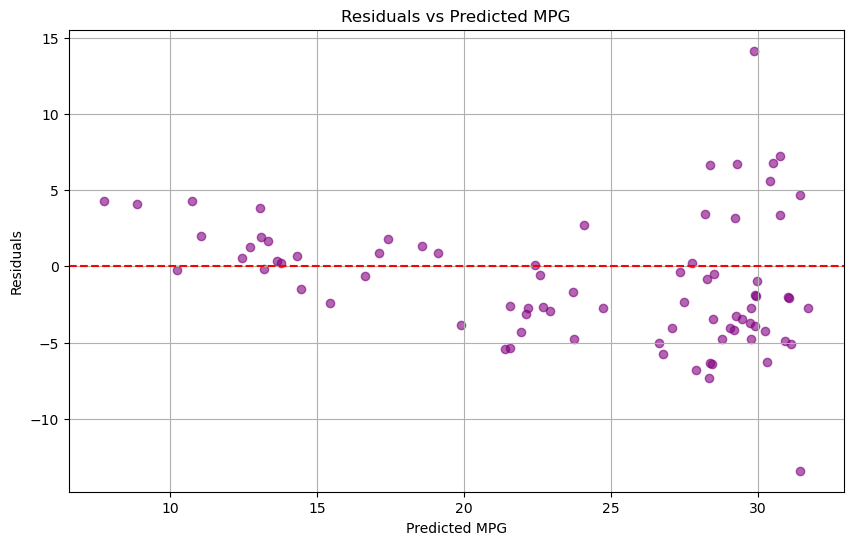

In [85]:
residuals = y_test - y_pred

plt.figure(figsize=(10,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted MPG")
plt.grid(True)
plt.show()